Training of neural networks with different parameters to visualise the effect of each with the aim of teaching the network the Matyas optimisation function trend

In [ ]:
# @title MATYAS FUNCTION
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [ ]:
# @title Generazione delle liste x_values, y_values e f_xy
np.random.seed(42)
num_samples = 10000
x_values = np.random.uniform(-10, 10, num_samples)
y_values = np.random.uniform(-10, 10, num_samples)

#Funzione
f_xy = 0.26*(x_values*x_values + y_values*y_values)-0.48*x_values*y_values

In [ ]:
# @title Separazione dei valori

train_x = x_values[0:8000]
test_x = x_values[8000:10000]
train_y = y_values[0:8000]
test_y = y_values[8000:10000]
f_xy_tr = f_xy[0:8000]
f_xy_te = f_xy[8000:10000]

In [ ]:
# @title Funzione np.stack per annidare le liste

xy_values_tr = np.stack([train_x, train_y], axis=1)
xy_values_te = np.stack([test_x, test_y], axis=1)

In [ ]:
# @title Generazione delle liste x_values, y_values e f_xy
np.random.seed(42)
num_samples = 10000
x_values = np.random.uniform(-10, 10, num_samples)
y_values = np.random.uniform(-10, 10, num_samples)

#Funzione
f_xy = 0.26*(x_values*x_values + y_values*y_values)-0.48*x_values*y_values

In [ ]:
# @title Definizione del modello: attivazione: sigmoide; 2 layers; 4 nodi ciascuno

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 400.4344
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 101.4983
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 26.3257
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 13.7460
Epoch 5/100
160/160 [==============================] - 1s 7ms/step - loss: 9.0771
Epoch 6/100
160/160 [==============================] - 1s 7ms/step - loss: 9.2955
Epoch 7/100
160/160 [==============================] - 1s 6ms/step - loss: 6.1411
Epoch 8/100
160/160 [==============================] - 1s 6ms/step - loss: 4.5681
Epoch 9/100
160/160 [==============================] - 1s 7ms/step - loss: 6.6220
Epoch 10/100
160/160 [==============================] - 1s 5ms/step - loss: 3.6650
Epoch 11/100
160/160 [==============================] - 1s 6ms/step - loss: 2.9657
Epoch 12/100
160/160 [==============================] - 1s 6ms/step - loss: 2.4547
Epoch 1

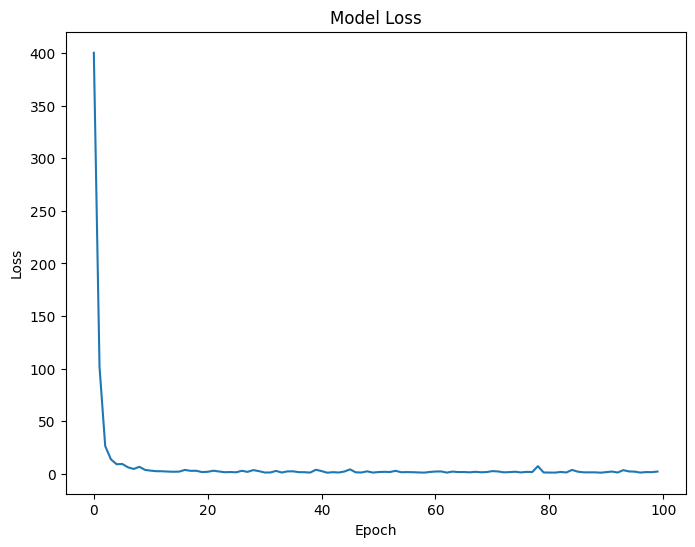

In [ ]:
# @title optimizer=adam ; learning rate=0.1 ; epochs=100 ; batch size=50 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=100, batch_size=50)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


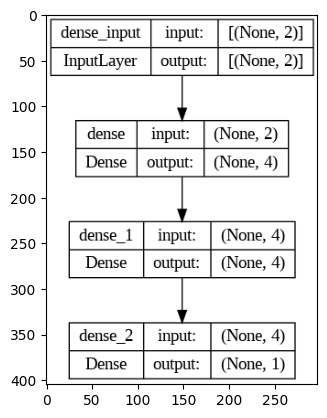

In [ ]:
# @title visualizzazione della rete neurale
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plt.imshow(plt.imread('model_plot.png'))
plt.show()

In [ ]:
# @title Test della rete neurale
final_test = model.predict(xy_values_te)

df_matyas = pd.DataFrame(data = test_x, columns = ['valori di x'])
df_matyas['valori di y'] = test_y
df_matyas['valori predetti'] = final_test
df_matyas['valori teorici'] = f_xy_te
print(df_matyas)


63/63 [==============================] - 0s 1ms/step
      valori di x  valori di y  valori predetti  valori teorici
0        4.405358     2.913813         2.015523        1.091879
1        3.745660    -1.951630         8.857729        8.146964
2       -8.084916    -0.561818        14.511583       14.896912
3        8.451448     4.334496         5.092579        5.872128
4        1.369444     7.526121        10.572445       10.267477
...           ...          ...              ...             ...
1995     7.153120     7.540773         1.742872        2.196673
1996     7.950177    -9.063721        68.682587       72.380577
1997     8.934158    -3.926031        38.766777       41.596928
1998    -2.050240    -1.133600         1.762794        0.311426
1999    -5.657192    -6.554704         1.749722        1.692686

[2000 rows x 4 columns]


Epoch 1/100
160/160 [==============================] - 1s 2ms/step - loss: 406.9060
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 316.2993
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 258.5188
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 210.9951
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 134.7303
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 37.4643
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 19.6597
Epoch 8/100
160/160 [==============================] - 0s 2ms/step - loss: 12.1972
Epoch 9/100
160/160 [==============================] - 0s 2ms/step - loss: 8.9679
Epoch 10/100
160/160 [==============================] - 0s 2ms/step - loss: 8.6539
Epoch 11/100
160/160 [==============================] - 0s 1ms/step - loss: 6.2690
Epoch 12/100
160/160 [==============================] - 0s 2ms/step - loss: 5.5129


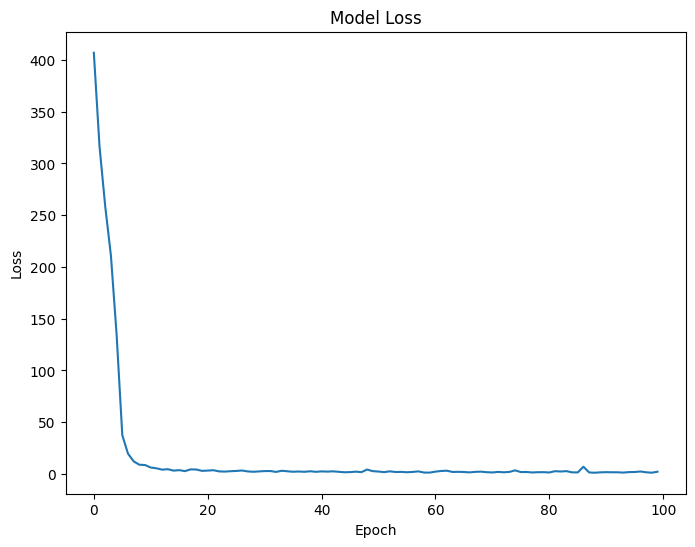

In [ ]:
# @title optimizer=adam ; learning rate=0.07 ; epochs=100 ; batch size=50 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])
opt = tf.keras.optimizers.Adam(learning_rate=0.07)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=100, batch_size=50)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/100
80/80 [==============================] - 1s 2ms/step - loss: 645.2173
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 548.6222
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 492.2286
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 450.9709
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 410.8329
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 387.7590
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 371.7726
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 358.4870
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 350.9196
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 346.1407
Epoch 11/100
80/80 [==============================] - 0s 2ms/step - loss: 339.8495
Epoch 12/100
80/80 [==============================] - 0s 2ms/step - loss: 323.8818
Epoch 13/100


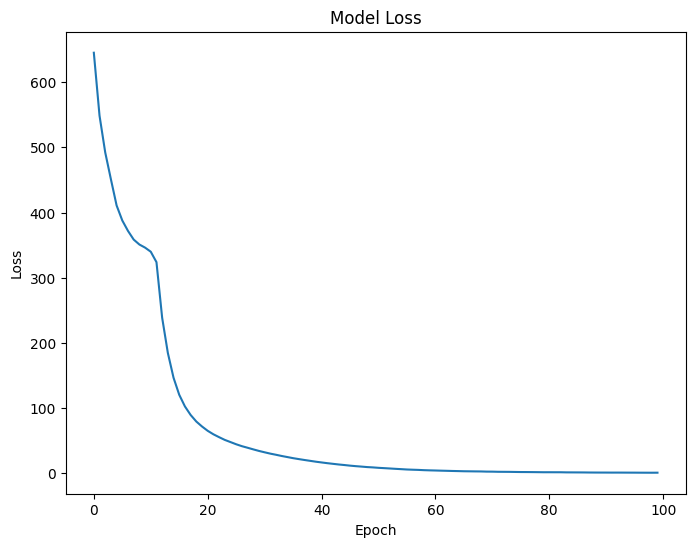

In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=100 ; batch size=100 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=100, batch_size=100)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/120
80/80 [==============================] - 1s 2ms/step - loss: 637.3466
Epoch 2/120
80/80 [==============================] - 0s 2ms/step - loss: 530.3322
Epoch 3/120
80/80 [==============================] - 0s 2ms/step - loss: 451.0233
Epoch 4/120
80/80 [==============================] - 0s 2ms/step - loss: 407.1458
Epoch 5/120
80/80 [==============================] - 0s 2ms/step - loss: 384.9899
Epoch 6/120
80/80 [==============================] - 0s 2ms/step - loss: 370.7500
Epoch 7/120
80/80 [==============================] - 0s 2ms/step - loss: 357.4982
Epoch 8/120
80/80 [==============================] - 0s 2ms/step - loss: 344.4807
Epoch 9/120
80/80 [==============================] - 0s 2ms/step - loss: 331.5025
Epoch 10/120
80/80 [==============================] - 0s 2ms/step - loss: 294.1492
Epoch 11/120
80/80 [==============================] - 0s 2ms/step - loss: 216.5436
Epoch 12/120
80/80 [==============================] - 0s 2ms/step - loss: 168.2016
Epoch 13/120


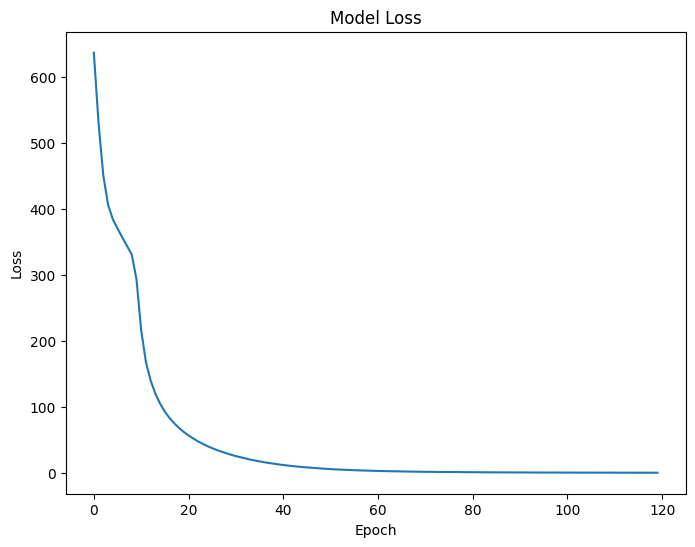

In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=120 ; batch size=100 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=120, batch_size=100)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/120
80/80 [==============================] - 1s 2ms/step - loss: 507.9446
Epoch 2/120
80/80 [==============================] - 0s 3ms/step - loss: 379.2839
Epoch 3/120
80/80 [==============================] - 0s 2ms/step - loss: 341.8669
Epoch 4/120
80/80 [==============================] - 0s 2ms/step - loss: 280.1055
Epoch 5/120
80/80 [==============================] - 0s 2ms/step - loss: 150.9295
Epoch 6/120
80/80 [==============================] - 0s 2ms/step - loss: 97.3484
Epoch 7/120
80/80 [==============================] - 0s 2ms/step - loss: 71.8473
Epoch 8/120
80/80 [==============================] - 0s 2ms/step - loss: 54.4492
Epoch 9/120
80/80 [==============================] - 0s 2ms/step - loss: 40.8769
Epoch 10/120
80/80 [==============================] - 0s 2ms/step - loss: 31.9813
Epoch 11/120
80/80 [==============================] - 0s 2ms/step - loss: 25.7382
Epoch 12/120
80/80 [==============================] - 0s 2ms/step - loss: 21.4033
Epoch 13/120
80/80 [

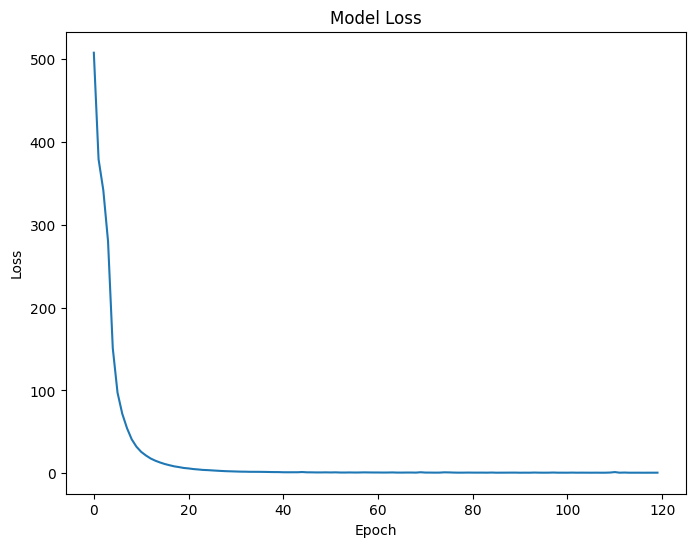

In [ ]:
# @title optimizer=adam ; learning rate=0.03 ; epochs=120 ; batch size=100 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])
opt = tf.keras.optimizers.Adam(learning_rate=0.03)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=120, batch_size=100)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/120
100/100 [==============================] - 1s 2ms/step - loss: 601.9654
Epoch 2/120
100/100 [==============================] - 0s 2ms/step - loss: 460.7332
Epoch 3/120
100/100 [==============================] - 0s 2ms/step - loss: 382.6545
Epoch 4/120
100/100 [==============================] - 0s 2ms/step - loss: 259.7198
Epoch 5/120
100/100 [==============================] - 0s 2ms/step - loss: 154.4233
Epoch 6/120
100/100 [==============================] - 0s 1ms/step - loss: 104.8129
Epoch 7/120
100/100 [==============================] - 0s 2ms/step - loss: 76.5293
Epoch 8/120
100/100 [==============================] - 0s 2ms/step - loss: 58.2954
Epoch 9/120
100/100 [==============================] - 0s 2ms/step - loss: 45.8348
Epoch 10/120
100/100 [==============================] - 0s 2ms/step - loss: 37.2486
Epoch 11/120
100/100 [==============================] - 0s 2ms/step - loss: 31.0154
Epoch 12/120
100/100 [==============================] - 0s 2ms/step - loss: 26.

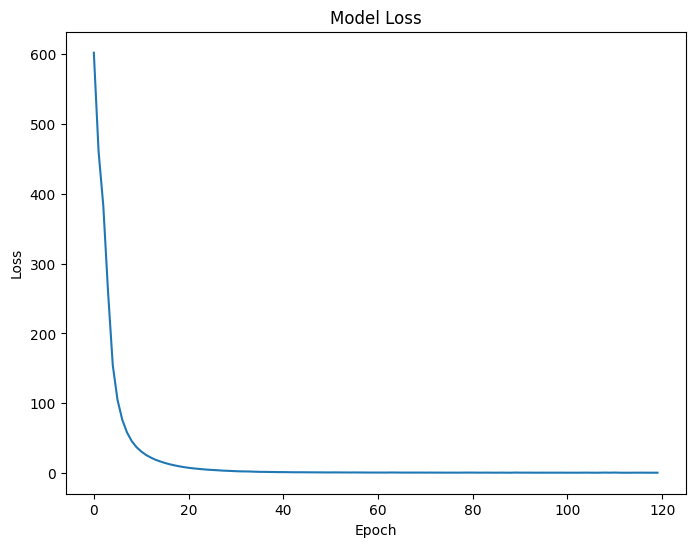

In [ ]:
# @title optimizer=adam ; learning rate=0.02 ; epochs=120 ; batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=120, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/120
115/115 [==============================] - 1s 2ms/step - loss: 535.8856
Epoch 2/120
115/115 [==============================] - 0s 2ms/step - loss: 405.6589
Epoch 3/120
115/115 [==============================] - 0s 2ms/step - loss: 374.8812
Epoch 4/120
115/115 [==============================] - 0s 2ms/step - loss: 356.0457
Epoch 5/120
115/115 [==============================] - 0s 2ms/step - loss: 336.4066
Epoch 6/120
115/115 [==============================] - 0s 2ms/step - loss: 290.6006
Epoch 7/120
115/115 [==============================] - 0s 2ms/step - loss: 151.1219
Epoch 8/120
115/115 [==============================] - 0s 2ms/step - loss: 102.2917
Epoch 9/120
115/115 [==============================] - 0s 2ms/step - loss: 77.7128
Epoch 10/120
115/115 [==============================] - 0s 2ms/step - loss: 62.5606
Epoch 11/120
115/115 [==============================] - 0s 2ms/step - loss: 52.0732
Epoch 12/120
115/115 [==============================] - 0s 2ms/step - loss: 4

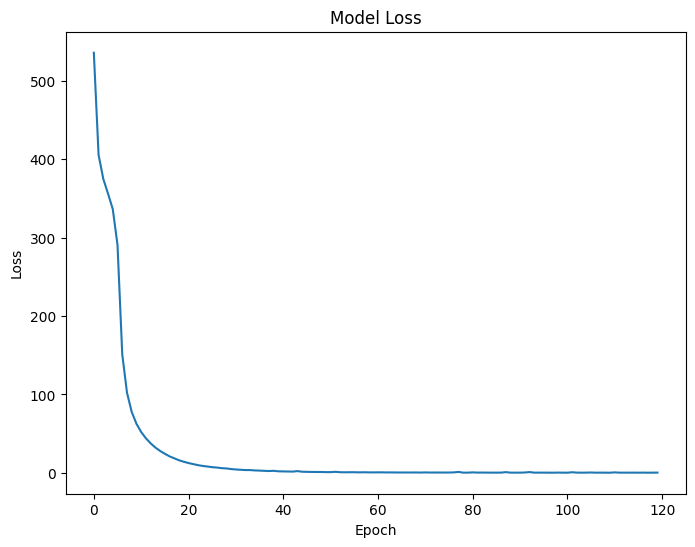

In [ ]:
# @title optimizer=adam ; learning rate=0.02 ; epochs=120 ; batch size=70 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=120, batch_size=70)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/90
115/115 [==============================] - 1s 2ms/step - loss: 563.3934
Epoch 2/90
115/115 [==============================] - 0s 2ms/step - loss: 415.8123
Epoch 3/90
115/115 [==============================] - 0s 2ms/step - loss: 376.3885
Epoch 4/90
115/115 [==============================] - 0s 2ms/step - loss: 358.3892
Epoch 5/90
115/115 [==============================] - 0s 2ms/step - loss: 341.7675
Epoch 6/90
115/115 [==============================] - 0s 3ms/step - loss: 319.8655
Epoch 7/90
115/115 [==============================] - 0s 4ms/step - loss: 238.2856
Epoch 8/90
115/115 [==============================] - 0s 3ms/step - loss: 125.8245
Epoch 9/90
115/115 [==============================] - 0s 3ms/step - loss: 88.1245
Epoch 10/90
115/115 [==============================] - 0s 4ms/step - loss: 68.0180
Epoch 11/90
115/115 [==============================] - 0s 4ms/step - loss: 54.7919
Epoch 12/90
115/115 [==============================] - 0s 3ms/step - loss: 44.5920
Epoch

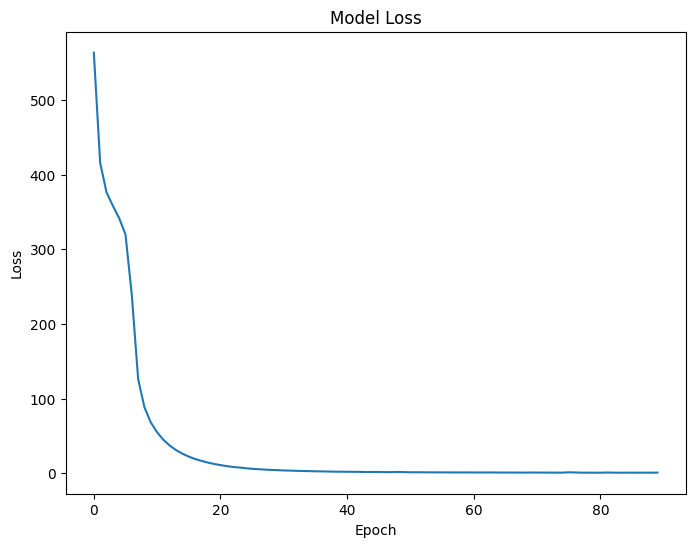

In [ ]:
# @title optimizer=adam ; learning rate=0.02 ; epochs=90 ; batch size=70 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=90, batch_size=70)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 449.5608
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 243.8843
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 73.0836
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 28.9391
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 15.7539
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 10.1516
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 7.3593
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 5.6629
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 4.2514
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 3.3375
Epoch 11/100
200/200 [==============================] - 0s 1ms/step - loss: 2.6704
Epoch 12/100
200/200 [==============================] - 0s 2ms/step - loss: 2.3635
Epoch

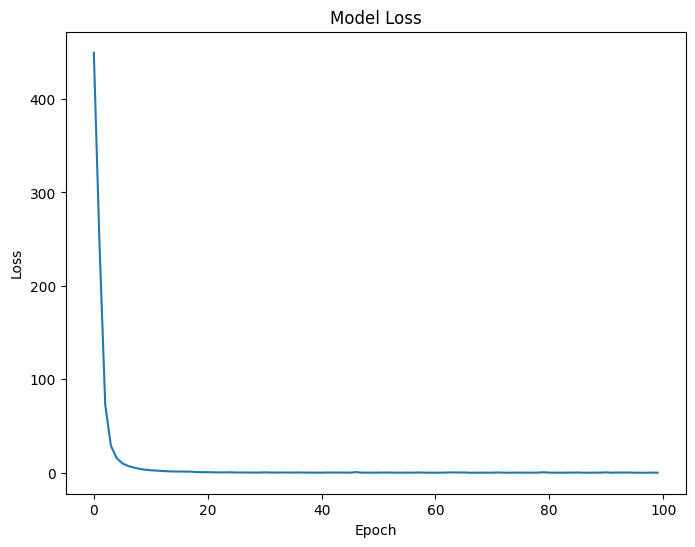

In [ ]:
# @title optimizer=adam ; learning rate=0.02 ; epochs=120 ; batch size=70 ; nodi=8,8 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='sigmoid', input_shape=(2,)),  # due nodi di input
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(1)  #un nodo di output
])
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer=opt, loss='mean_squared_error')

history = model.fit(xy_values_tr, f_xy_tr, epochs=100, batch_size=40)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Max values of the function:  94.03992881745285
Min values of the function:  0.004296940147527416
Mean of the function:  16.895409392689913
250/250 [==============================] - 1s 2ms/step
      valori di x  valori di y  valori predetti  valori teorici
0        4.405358     2.913813         1.054547        1.091879
1        3.745660    -1.951630         7.914756        8.146964
2       -8.084916    -0.561818        15.060397       14.896912
3        8.451448     4.334496         5.786913        5.872128
4        1.369444     7.526121        10.106203       10.267477
...           ...          ...              ...             ...
1995     7.153120     7.540773         1.588281        2.196673
1996     7.950177    -9.063721        72.410507       72.380577
1997     8.934158    -3.926031        41.382599       41.596928
1998    -2.050240    -1.133600         0.368392        0.311426
1999    -5.657192    -6.554704         1.975464        1.692686

[2000 rows x 4 columns]


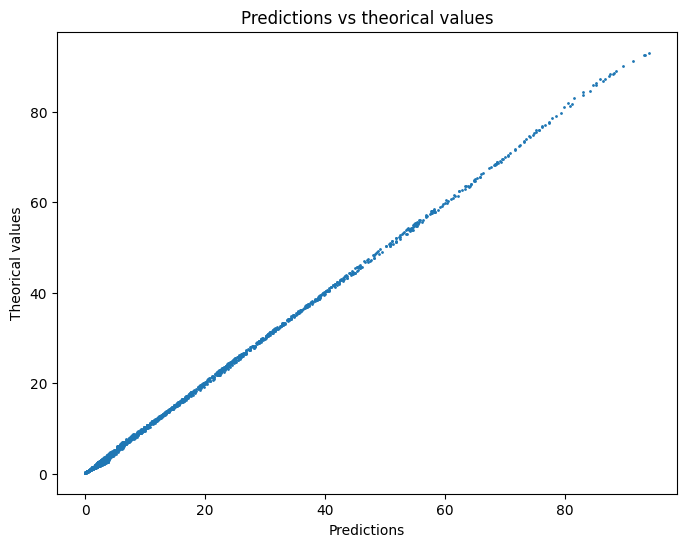

In [ ]:
print('Max values of the function: ', max(f_xy_te))
print('Min values of the function: ', min(f_xy_te))
print('Mean of the function: ', np.mean(f_xy_te))

final_test_te = model.predict(xy_values_te)
final_test_tr = model.predict(xy_values_tr)


df_matyas = pd.DataFrame(data = test_x, columns = ['valori di x'])
df_matyas['valori di y'] = test_y
df_matyas['valori predetti'] = final_test_te
df_matyas['valori teorici'] = f_xy_te
print(df_matyas)


plt.figure(figsize=(8,6))
plt.scatter(f_xy_te, final_test_te, s = 1)
plt.title('Predictions vs theorical values')
plt.xlabel('Predictions')
plt.ylabel('Theorical values')
plt.grid()
plt.show()


In [ ]:
# @title Standard deviation
print(np.std(final_test_te[:,0]-f_xy_te))
print(np.std(final_test_tr[:,0]-f_xy_tr))


0.2977851310892215
0.2978432565694584


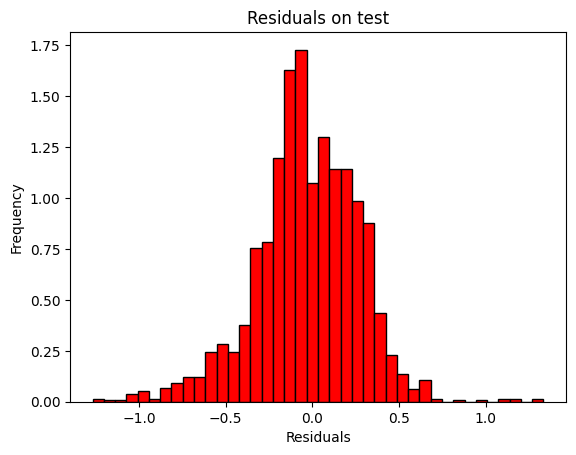

In [ ]:
residuals = final_test_te[:,0] - f_xy_te
plt.hist(residuals, bins=40, density=True, alpha=1, color = 'red', edgecolor = 'black')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals on test')

plt.show()



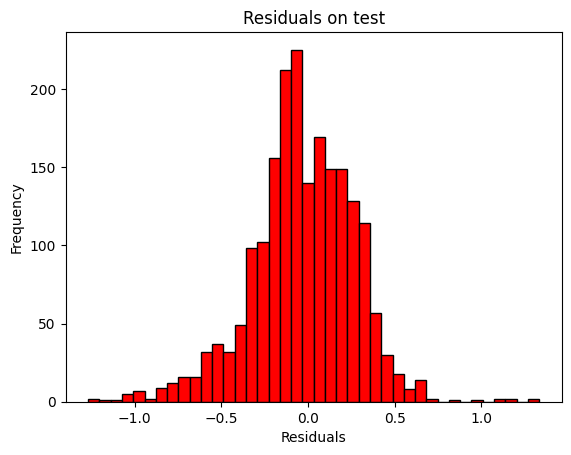

In [ ]:
residuals = final_test_te[:,0] - f_xy_te
plt.hist(residuals, bins=40, density=False, alpha=1, color = 'red', edgecolor = 'black')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals on test')

plt.show()
